<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Copy_of_Assignment_Solution_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> Your task is to predict whether a message will be spam or not. In the class we used the <code>sklearn.countvectorizer</code> to find vectors for each message. Now you need to do the same task but rather than using countvectorizer, you are required to use TF-IDF vectorizer to find the vectors for the messages. </b>

### You will use <code>tfidfVectorizer</code>. It will convert collection of text documents (SMS corpus) into 2D matrix. One dimension represent documents and other dimension repesents each unique word in SMS corpus.

### If $n^{th}$ term $t$ has occured $p$ times in $m^{th}$ document, $(m, n)$ value in this matrix will be $\rm TF-IDF(t)$, where 
$\rm TF-IDF(t) = \rm Term ~Frequency (TF) * \rm Inverse~ Document ~Frequency (IDF)$
* ### <b>Term Frequency (TF)</b> is a measure of how frequent a term occurs in a document.

* ### $TF(t)$= Number of times term $t$ appears in document ($p$) / Total number of terms in that document

* ### <b>Inverse Document Frequency (IDF)</b> is measure of how important term is. For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.

* ###  $IDF(t)= log(\frac{\rm Total ~ number ~ of ~document}{ Number ~of~ documents~ with ~term ~t ~in~ it})$

### At end we will have for every message, vectors normalized to unit length equal to size of vocabulary (number of unique terms from entire SMS corpus)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
message = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 3/Week 3/Day 2/spam.csv', encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


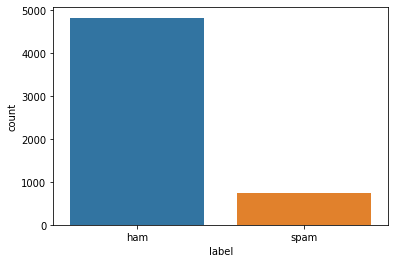

In [ ]:
sns.countplot(message['label'])

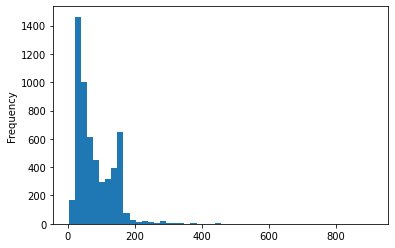

In [ ]:
message['length']=message['message'].apply(len)
message['length'].plot(bins=50,kind='hist')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
message['tokenized_message'] = message['message'].apply(text_process)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(message['tokenized_message'])

In [ ]:
X.toarray()[4560]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36644381, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
print(vectorizer.get_feature_names())

['0800', '08000839402', '08000930705', '10', '100', '1000', '10p', '12', '12hrs', '150', '150p', '150pm', '150pmsg', '150ppm', '16', '18', '1st', '200', '2000', '2003', '250', '2nd', '300', '350', '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola', 'able', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah', 'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap', 'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz', 'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout', 'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'buy', 'call', 'called', '

In [ ]:
len(vectorizer.get_feature_names())

872

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.3)

In [ ]:
msg_train.head()


1975                           Delhi chennai still silent
5114                                Argh fuck nobody town
575            1000 cash 2000 prize claim call09050000327
2129                             Mine like fr china noisy
5252    studies alone without anyones help cant need s...
Name: tokenized_message, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [ ]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array,label_train)

In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[2619  743]
 [   0  538]]
[[1122  341]
 [  14  195]]


In [ ]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))


              precision    recall  f1-score   support

         ham       1.00      0.78      0.88      3362
        spam       0.42      1.00      0.59       538

    accuracy                           0.81      3900
   macro avg       0.71      0.89      0.73      3900
weighted avg       0.92      0.81      0.84      3900



              precision    recall  f1-score   support

         ham       0.99      0.77      0.86      1463
        spam       0.36      0.93      0.52       209

    accuracy                           0.79      1672
   macro avg       0.68      0.85      0.69      1672
weighted avg       0.91      0.79      0.82      1672



In [ ]:

msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.3)

In [ ]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(train_array,label_train)

In [ ]:

train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3347   11]
 [  74  468]]
[[1464    3]
 [  35  170]]


In [ ]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3358
        spam       0.98      0.86      0.92       542

    accuracy                           0.98      3900
   macro avg       0.98      0.93      0.95      3900
weighted avg       0.98      0.98      0.98      3900



              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1467
        spam       0.98      0.83      0.90       205

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



In [ ]:
 from sklearn.naive_bayes import BernoulliNB
spam_detect_model = BernoulliNB().fit(train_array,label_train)

In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3354    4]
 [  63  479]]
[[1464    3]
 [  25  180]]


In [ ]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3358
        spam       0.99      0.88      0.93       542

    accuracy                           0.98      3900
   macro avg       0.99      0.94      0.96      3900
weighted avg       0.98      0.98      0.98      3900



              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1467
        spam       0.98      0.88      0.93       205

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



Definately multinaumial has outperfomed out of these Algorithms